In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

raw = pd.read_csv('Backtest.csv')

df = raw.T
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)
df.rename

# Convert the numeric columns to float
numeric_columns = ['PnL', 'Fitness', 'TR', 'std(RR)', 'MDD', 'Win Rate', 'nTrade']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

strategy_mapping = {
    '0.002': 'STS1',
    '0.004': 'STS2',
    '0.005': 'STS3',
    '0.008': 'STS4'
}

data = df[df['Currency']=='AUDJPY'].copy()

for threshold, strategy in strategy_mapping.items():
    data.loc[data['Threshold'] == threshold, 'Strategy'] = strategy

avg_dict = dict()
        
def update_strategy_dict(df, strategy_dict):
    for strategy in df['Strategy'].unique():
        sub_df = df[df['Strategy']==strategy]
        strategy_dict.update({
            strategy: [
                np.mean(sub_df['PnL']), np.mean(sub_df['Fitness']),
                np.mean(sub_df['TR']), np.mean(sub_df['std(RR)']),
                np.mean(sub_df['MDD']), np.mean(sub_df['Win Rate']),
                np.mean(sub_df['nTrade'])
            ]
        })

update_strategy_dict(data, avg_dict)

avgdf = pd.DataFrame(avg_dict)
avgdf['Index'] = ['PnL','Fitness','TR','std(RR)','MDD','Win Rate','nTrade']
avgdf.set_index('Index', inplace=True)

In [3]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for 'TR', 'MDD', and 'Win Rate' columns for each strategy
selected_cols = ['TR', 'MDD', 'Win Rate']
strategies_USDCAD = data['Strategy'].unique()
skew_kurt_strategy_USDCAD = pd.DataFrame(columns=['Strategy', 'Column', 'Skewness', 'Kurtosis'])
for strategy in strategies_USDCAD:
    strategy_data = data[data['Strategy'] == strategy]
    for col in selected_cols:
        skew_val = skew(strategy_data[col].dropna())
        kurt_val = kurtosis(strategy_data[col].dropna())
        skew_kurt_strategy_USDCAD = skew_kurt_strategy_USDCAD.append({
            'Strategy': strategy,
            'Column': col,
            'Skewness': skew_val,
            'Kurtosis': kurt_val
        }, ignore_index=True)

# Pivot the table for a better view
summary_table_USDCAD = skew_kurt_strategy_USDCAD.pivot_table(index='Strategy', columns='Column', values=['Skewness', 'Kurtosis'])
summary_table_USDCAD.columns = ['_'.join(col).strip() for col in summary_table_USDCAD.columns.values]
summary_table_USDCAD.reset_index(inplace=True)

# Display the summary table
summary_table_USDCAD


/var/folders/yj/9why7vcd7p71vxqyg4ln9nw40000gn/T/ipykernel_14496/1247330734.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skew_kurt_strategy_USDCAD = skew_kurt_strategy_USDCAD.append({
/var/folders/yj/9why7vcd7p71vxqyg4ln9nw40000gn/T/ipykernel_14496/1247330734.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skew_kurt_strategy_USDCAD = skew_kurt_strategy_USDCAD.append({
/var/folders/yj/9why7vcd7p71vxqyg4ln9nw40000gn/T/ipykernel_14496/1247330734.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skew_kurt_strategy_USDCAD = skew_kurt_strategy_USDCAD.append({
/var/folders/yj/9why7vcd7p71vxqyg4ln9nw40000gn/T/ipykernel_14496/1247330734.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

,Strategy,Kurtosis_MDD,Kurtosis_TR,Kurtosis_Win Rate,Skewness_MDD,Skewness_TR,Skewness_Win Rate
0,B&H,-0.740399,-0.082461,-2.000000,0.254623,0.721149,0.000000
1,MACD,0.166210,0.532770,0.081734,1.000709,0.505815,1.136703
2,MTS,-1.291981,0.615520,-0.451514,-0.255414,1.054410,-0.134364
3,MTSGA,-1.445430,0.329696,-1.359043,-0.252811,1.016304,-0.135866
4,RSI,-0.584078,-0.662390,-1.333359,0.622908,0.699765,0.120633
5,STS1,-0.151268,-0.812892,-1.078230,0.986671,-0.286755,0.219434
6,STS2,4.042311,-0.251709,1.064568,2.283632,-0.830006,0.764883
7,STS3,-1.422031,0.048000,-0.598524,0.610976,-0.497090,0.279731
8,STS4,-1.445609,0.063928,-0.626868,0.566044,0.048753,-0.294311


In [4]:
avgdf

,B&H,RSI,MACD,STS1,STS2,STS3,STS4,MTS,MTSGA
Index,,,,,,,,,
PnL,72058.333333,-45600.000000,-15300.000000,-127566.666667,29375.000000,14483.333333,-11083.333333,140375.000000,144691.666667
Fitness,0.004925,-0.006058,-0.001933,-0.015333,0.002908,0.001392,-0.002200,0.015150,0.015892
TR,0.009050,-0.004950,-0.001283,-0.014575,0.003342,0.001825,-0.001467,0.015700,0.016433
std(RR),NaN,0.002500,0.002600,0.001783,0.002950,0.003308,0.005933,0.002133,0.001750
MDD,0.041300,0.011042,0.006500,0.007483,0.004150,0.004558,0.007275,0.005667,0.005467
Win Rate,0.500000,0.575408,0.327258,0.422192,0.476367,0.497392,0.428775,0.447925,0.494825
nTrade,1.000000,97.666667,77.250000,117.500000,32.666667,20.500000,9.333333,80.916667,109.500000


# box-plot

In [5]:
# Define a function to analyze a given column
from scipy import stats

def analyze_column(data, column):
    strategies = data['Strategy'].unique()

    # Boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Strategy', y=column, data=data)
    plt.title(f'Boxplot of {column} by Strategy')
    plt.show()

    # ANOVA
    group_data = [data[data['Strategy'] == strategy][column].values for strategy in strategies]
    f_val, p_val = stats.f_oneway(*group_data)
    print(f"ANOVA for {column}: F={f_val}, p={p_val}")

    # Skewness and Kurtosis
    for strategy in strategies:
        skewness = stats.skew(data[data['Strategy'] == strategy][column])
        kurtosis = stats.kurtosis(data[data['Strategy'] == strategy][column])
        print(f"For {strategy}, {column}: skewness={skewness}, kurtosis={kurtosis}")


=== Analysis for Fitness ===


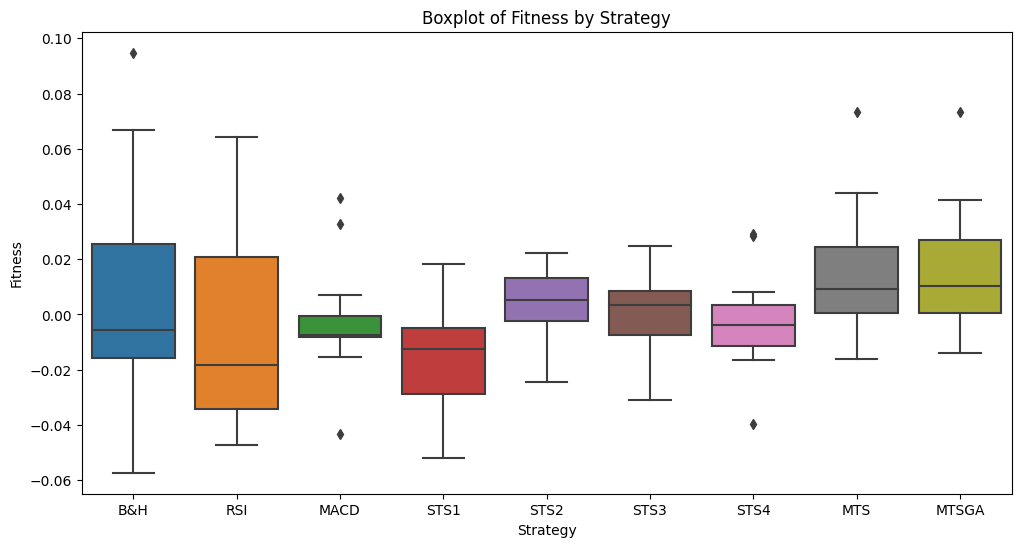

ANOVA for Fitness: F=1.7333121121196853, p=0.09994764052161637
For B&H, Fitness: skewness=0.7031241346295395, kurtosis=-0.14190877175616512
For RSI, Fitness: skewness=0.6966961500665224, kurtosis=-0.6822059366253983
For MACD, Fitness: skewness=0.494508373576511, kurtosis=0.511301738927413
For STS1, Fitness: skewness=-0.2522337966649297, kurtosis=-0.7991214339627635
For STS2, Fitness: skewness=-0.8252511999410895, kurtosis=-0.25195883501790783
For STS3, Fitness: skewness=-0.4915307549109927, kurtosis=0.04409597630533302
For STS4, Fitness: skewness=0.04981899955249387, kurtosis=0.06703291926392074
For MTS, Fitness: skewness=1.0503201292885458, kurtosis=0.6135983927221651
For MTSGA, Fitness: skewness=1.007216971955927, kurtosis=0.3164683551123151


In [6]:
print(f"\n=== Analysis for Fitness ===")
analyze_column(data, 'Fitness')


=== Analysis for TR ===


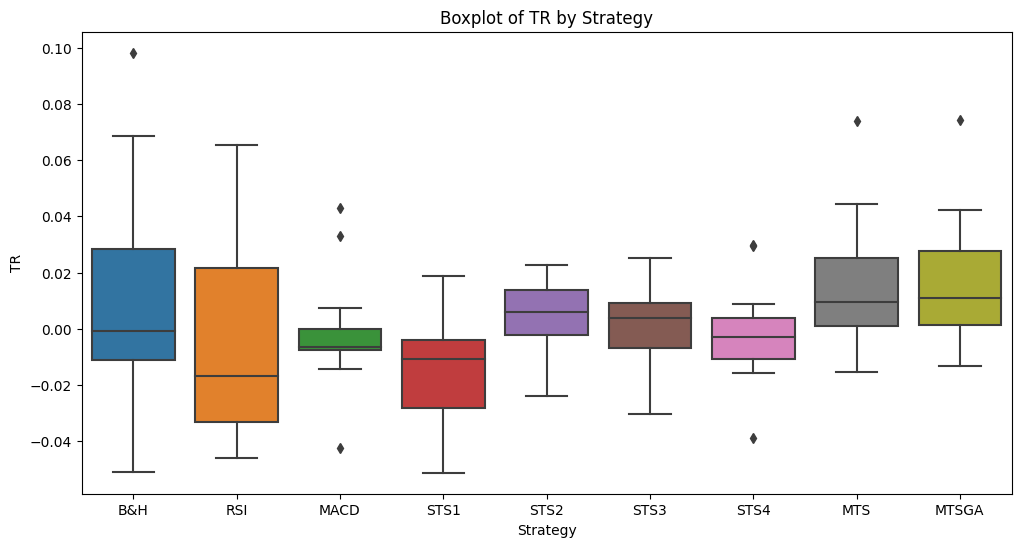

ANOVA for TR: F=1.7924106451331185, p=0.08742685037078098
For B&H, TR: skewness=0.7211486649866055, kurtosis=-0.08246088806844876
For RSI, TR: skewness=0.6997645168577283, kurtosis=-0.6623902844488274
For MACD, TR: skewness=0.5058152147268093, kurtosis=0.5327698210442042
For STS1, TR: skewness=-0.28675546559002524, kurtosis=-0.8128916129586559
For STS2, TR: skewness=-0.8300056334817004, kurtosis=-0.2517094004794864
For STS3, TR: skewness=-0.4970903119927822, kurtosis=0.04800034755686022
For STS4, TR: skewness=0.04875349471364292, kurtosis=0.06392848683196384
For MTS, TR: skewness=1.0544098226541023, kurtosis=0.6155200167972041
For MTSGA, TR: skewness=1.0163043861476695, kurtosis=0.32969643195835463


In [7]:
print(f"\n=== Analysis for TR ===")
analyze_column(data, 'TR')


=== Analysis for MDD ===


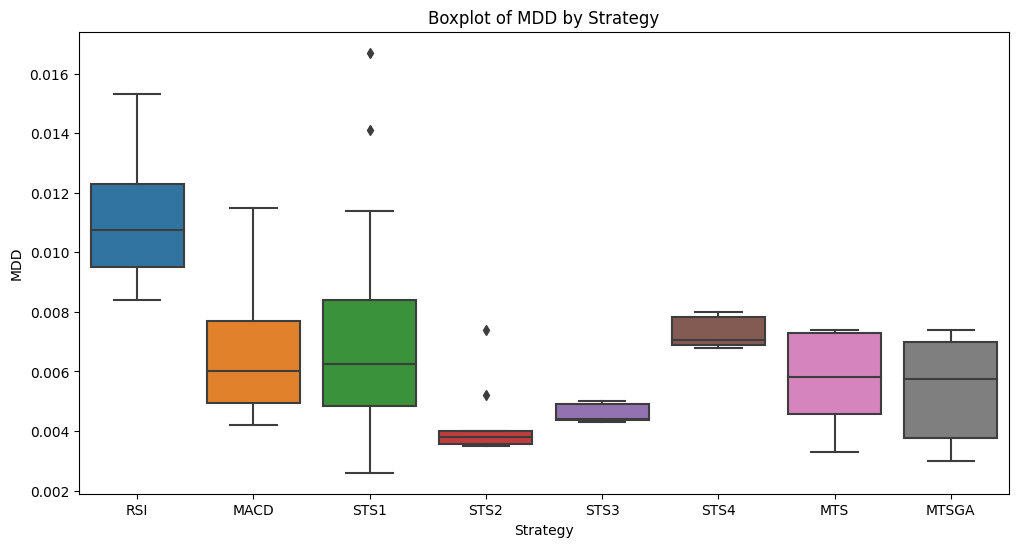

ANOVA for MDD: F=12.950512717023672, p=2.4264063193175154e-11
For RSI, MDD: skewness=0.6229084832643073, kurtosis=-0.5840781432194357
For MACD, MDD: skewness=1.0007092303531318, kurtosis=0.16620968392556312
For STS1, MDD: skewness=0.986671214064703, kurtosis=-0.1512676928827319
For STS2, MDD: skewness=2.2836315480413085, kurtosis=4.042310612383908
For STS3, MDD: skewness=0.6109758010713193, kurtosis=-1.4220314514894148
For STS4, MDD: skewness=0.5660435694327169, kurtosis=-1.445609335719231
For MTS, MDD: skewness=-0.25541426895789293, kurtosis=-1.2919805984605943
For MTSGA, MDD: skewness=-0.2528108561013559, kurtosis=-1.4454295622360904


In [8]:
print(f"\n=== Analysis for MDD ===")
analyze_column(data[data['Strategy']!='B&H'], 'MDD')


=== Analysis for MDD ===


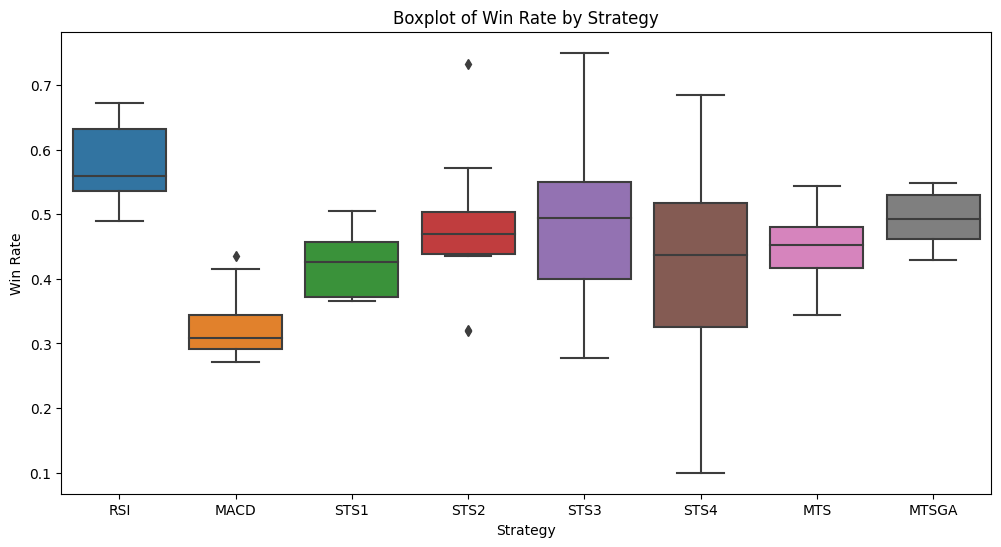

ANOVA for Win Rate: F=6.624248326633178, p=2.7054060099255568e-06
For RSI, Win Rate: skewness=0.12063285311291895, kurtosis=-1.3333589706551907
For MACD, Win Rate: skewness=1.1367031597352506, kurtosis=0.08173413920286876
For STS1, Win Rate: skewness=0.21943401431233558, kurtosis=-1.0782298096758836
For STS2, Win Rate: skewness=0.7648834697074822, kurtosis=1.0645681745427327
For STS3, Win Rate: skewness=0.2797305119248798, kurtosis=-0.5985243663169424
For STS4, Win Rate: skewness=-0.29431116737064583, kurtosis=-0.6268675348927828
For MTS, Win Rate: skewness=-0.134364045334569, kurtosis=-0.4515137795467936
For MTSGA, Win Rate: skewness=-0.13586603060730165, kurtosis=-1.3590426919795755


In [9]:
print(f"\n=== Analysis for MDD ===")
analyze_column(data[data['Strategy']!='B&H'], 'Win Rate')

# Avg, Skewness, and Kurtosis

## PnL

In [10]:
avgdf

,B&H,RSI,MACD,STS1,STS2,STS3,STS4,MTS,MTSGA
Index,,,,,,,,,
PnL,72058.333333,-45600.000000,-15300.000000,-127566.666667,29375.000000,14483.333333,-11083.333333,140375.000000,144691.666667
Fitness,0.004925,-0.006058,-0.001933,-0.015333,0.002908,0.001392,-0.002200,0.015150,0.015892
TR,0.009050,-0.004950,-0.001283,-0.014575,0.003342,0.001825,-0.001467,0.015700,0.016433
std(RR),NaN,0.002500,0.002600,0.001783,0.002950,0.003308,0.005933,0.002133,0.001750
MDD,0.041300,0.011042,0.006500,0.007483,0.004150,0.004558,0.007275,0.005667,0.005467
Win Rate,0.500000,0.575408,0.327258,0.422192,0.476367,0.497392,0.428775,0.447925,0.494825
nTrade,1.000000,97.666667,77.250000,117.500000,32.666667,20.500000,9.333333,80.916667,109.500000


In [11]:
unique_strategies = data['Strategy'].unique()

# Calculate skewness and kurtosis for PnL for each strategy
skewness_kurtosis = {strategy: {"skewness": stats.skew(data[data['Strategy'] == strategy]['PnL']),
                                 "kurtosis": stats.kurtosis(data[data['Strategy'] == strategy]['PnL'])} 
                     for strategy in unique_strategies}
skewness_kurtosis


{'B&H': {'skewness': 0.7087909476470624, 'kurtosis': -0.021363374072607577},
 'RSI': {'skewness': 0.7540528957641092, 'kurtosis': -0.540146281016276},
 'MACD': {'skewness': 0.4098678810053685, 'kurtosis': 0.6387409358119038},
 'STS1': {'skewness': -0.29654010940482334, 'kurtosis': -0.8287407103981694},
 'STS2': {'skewness': -0.8124836363172132, 'kurtosis': -0.3091283270524201},
 'STS3': {'skewness': -0.5017326158139481, 'kurtosis': -0.024369752473556883},
 'STS4': {'skewness': 0.11314057536393632, 'kurtosis': 0.02228300237455061},
 'MTS': {'skewness': 1.1599784085124885, 'kurtosis': 0.7939186799961528},
 'MTSGA': {'skewness': 1.1592354619918168, 'kurtosis': 0.6345427191785067}}

# PnL
## Hist

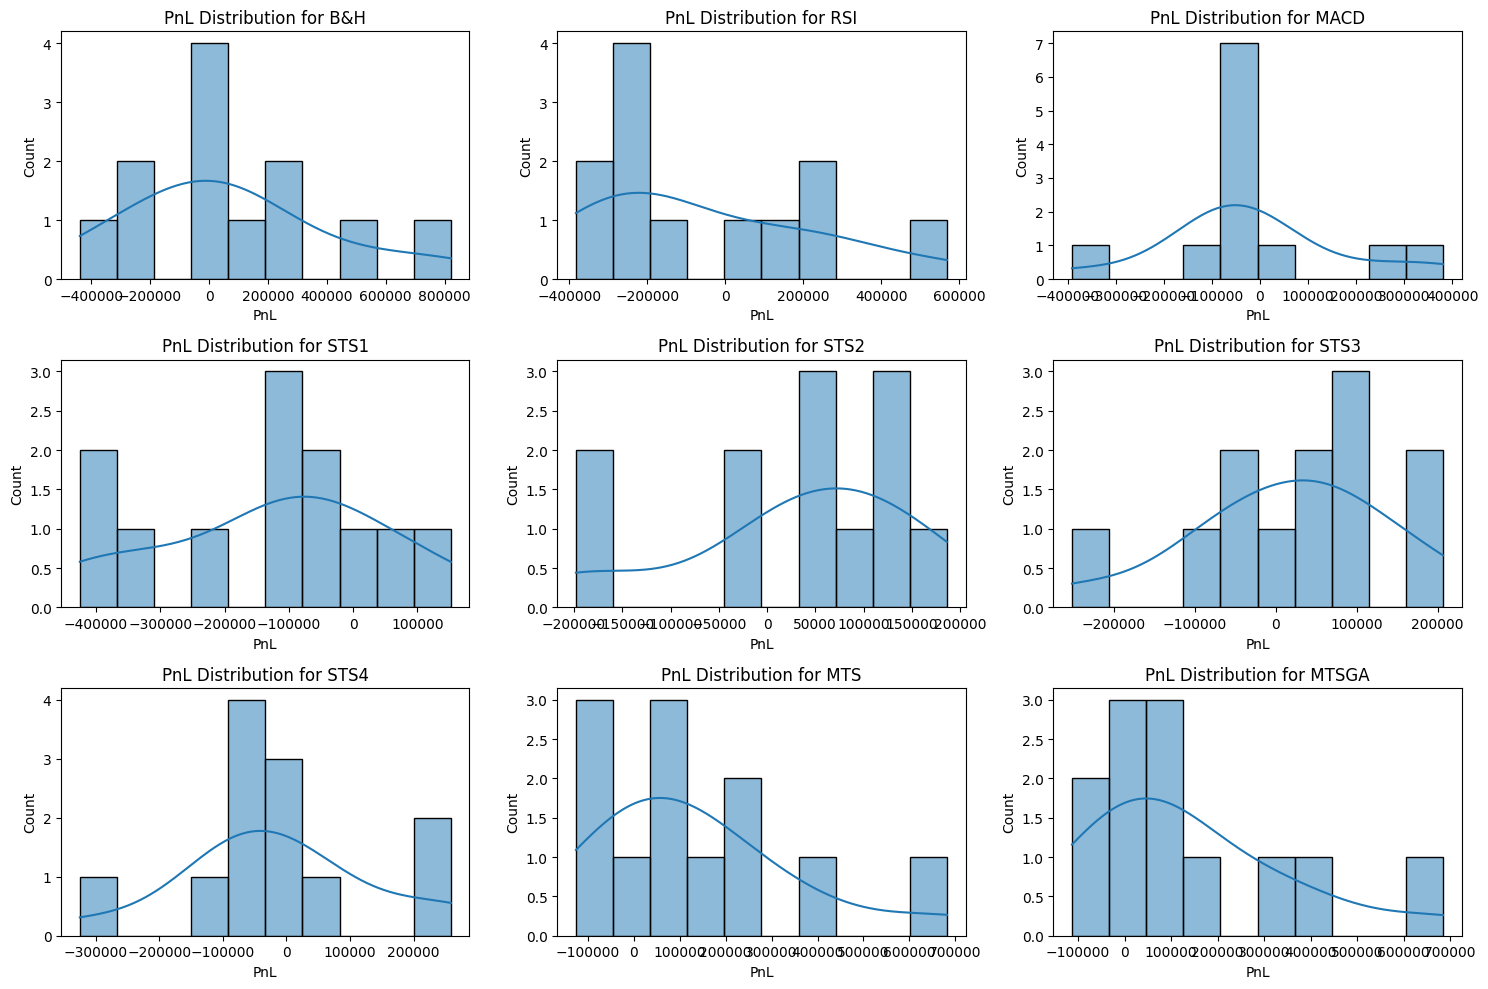

In [12]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['PnL'], bins=10, kde=True)
    plt.title(f'PnL Distribution for {strategy}')

plt.tight_layout()
plt.show()

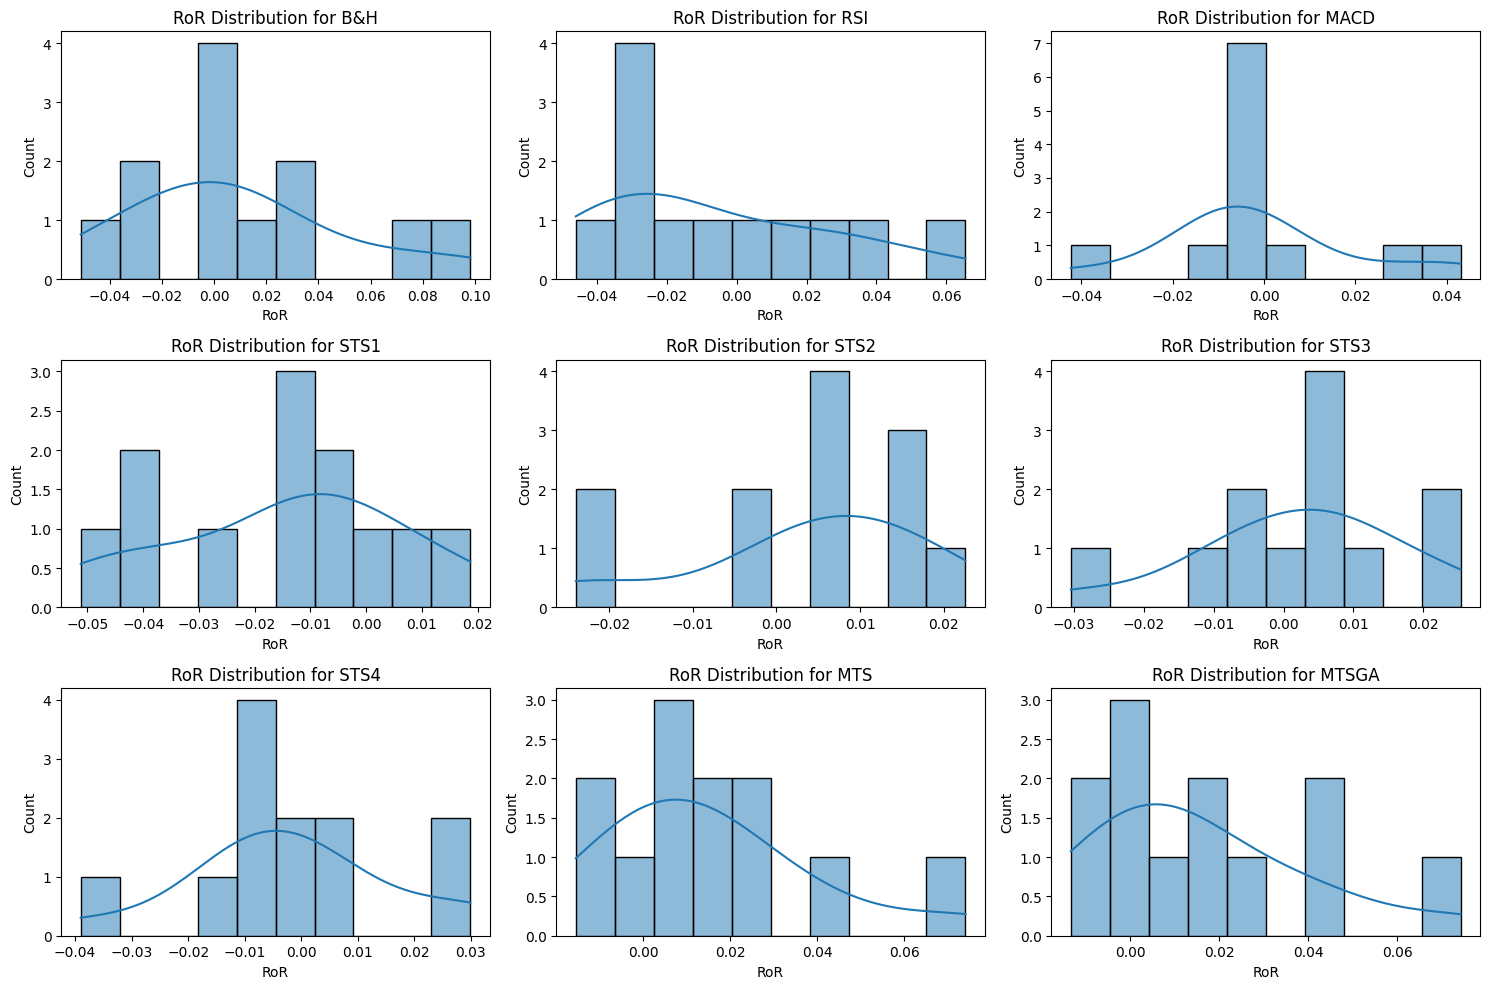

In [13]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['TR'], bins=10, kde=True)
    plt.title(f'RoR Distribution for {strategy}')
    plt.xlabel('RoR')

    
plt.tight_layout()
plt.show()

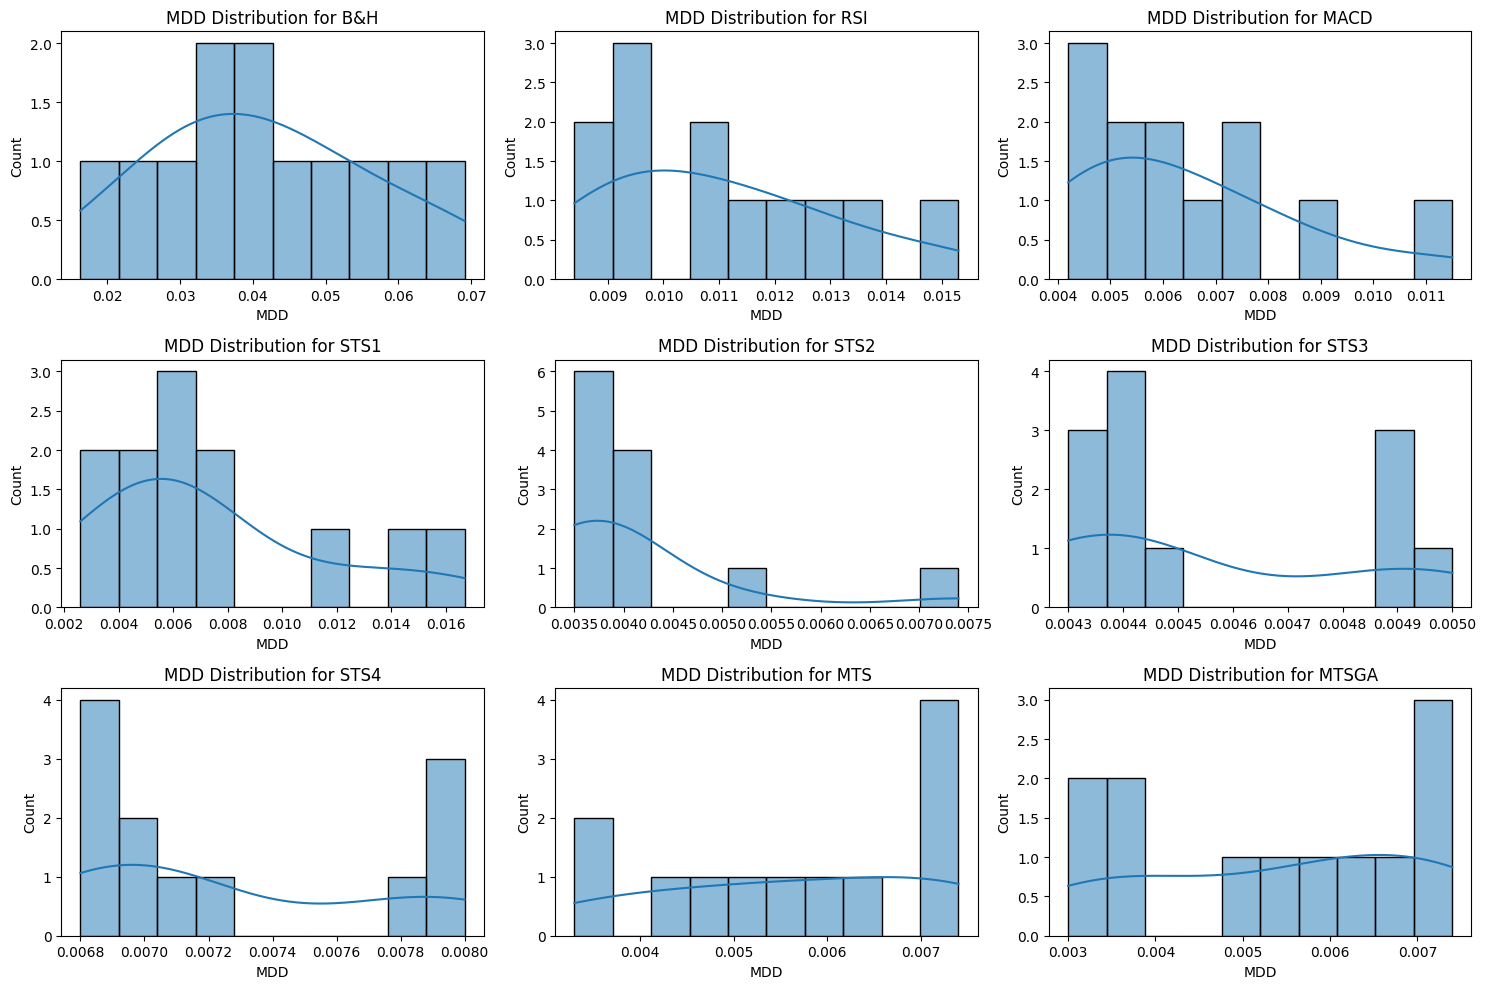

In [14]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['MDD'], bins=10, kde=True)
    plt.title(f'MDD Distribution for {strategy}')
    plt.xlabel('MDD')

    
plt.tight_layout()
plt.show()

## Kruskal-Wallis

In [15]:
# Perform Kruskal-Wallis test
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['PnL'] for strategy in unique_strategies])

kruskal_result

KruskalResult(statistic=15.292898402990147, pvalue=0.053694288657590836)

## M-W U Test

The Mann-Whitney U test is a non-parametric test that can be used to compare two independent samples. However, please note that performing multiple tests increases the likelihood of Type I errors (false positives), so a correction method such as the Bonferroni correction is usually applied to control the family-wise error rate.

In [16]:
from scipy.stats import mannwhitneyu
from itertools import combinations

# Get all combinations of strategies
strategy_combinations = list(combinations(unique_strategies, 2))

# Initialize an empty DataFrame to store the results
mann_whitney_results = pd.DataFrame(columns=['Group1', 'Group2', 'Statistic', 'p-value'])

# Perform Mann-Whitney U test for each pair of strategies
for group1, group2 in strategy_combinations:
    stat, p = mannwhitneyu(data[data['Strategy'] == group1]['PnL'], 
                           data[data['Strategy'] == group2]['PnL'],
                           alternative='two-sided')
    temp_df = pd.DataFrame({'Group1': [group1], 
                            'Group2': [group2], 
                            'Statistic': [stat], 
                            'p-value': [p]})
    mann_whitney_results = pd.concat([mann_whitney_results, temp_df])

# Apply Bonferroni correction
mann_whitney_results['p-value'] *= len(strategy_combinations)
mann_whitney_results['p-value'] = mann_whitney_results['p-value'].clip(upper=1)

# Display the results
mann_whitney_results.sort_values(by='p-value')


,Group1,Group2,Statistic,p-value
0,STS1,MTSGA,23.0,0.183885
0,STS1,MTS,24.0,0.219562
0,STS1,STS2,33.0,0.944258
0,B&H,RSI,87.0,1.000000
0,MACD,MTSGA,39.0,1.000000
0,STS1,STS3,36.0,1.000000
0,STS1,STS4,45.0,1.000000
0,MACD,MTS,42.0,1.000000
0,STS2,STS3,80.0,1.000000
0,STS2,MTS,55.0,1.000000


# Total Return (RoR)

In [17]:
# Check if the assumptions of normality and homogeneity of variances are met for 'TR'

# Normality
print("Shapiro-Wilk Test for Normality:")
for strategy in unique_strategies:
    _, p = stats.shapiro(data[data['Strategy'] == strategy]['TR'])
    print(f"{strategy}: p-value = {p}")

# Homogeneity of variances
_, p = stats.levene(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])
print(f"\nLevene's Test for Homogeneity of Variances: p-value = {p}")


Shapiro-Wilk Test for Normality:
B&H: p-value = 0.4504317343235016
RSI: p-value = 0.22261855006217957
MACD: p-value = 0.04711977019906044
STS1: p-value = 0.7228996753692627
STS2: p-value = 0.15212762355804443
STS3: p-value = 0.9180464744567871
STS4: p-value = 0.41734910011291504
MTS: p-value = 0.2618428170681
MTSGA: p-value = 0.2027505487203598

Levene's Test for Homogeneity of Variances: p-value = 0.09227381483807713


In [18]:
# Perform Kruskal-Wallis test for 'MDD'
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])

kruskal_result

KruskalResult(statistic=15.05986428744961, pvalue=0.057991835684941824)

## ANOVA

In [19]:
# Perform ANOVA for 'TR'
anova_result = stats.f_oneway(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])

anova_result

F_onewayResult(statistic=1.7924106451331185, pvalue=0.08742685037078098)

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for 'TR'
tukey_result = pairwise_tukeyhsd(endog=data['TR'], groups=data['Strategy'], alpha=0.1)

# Convert the result to a DataFrame
tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

# Display the results
tukey_df.sort_values(by='p-adj')


,group1,group2,meandiff,p-adj,lower,upper,reject
22,MTSGA,STS1,-0.0310,0.0882,-0.0615,-0.0005,True
17,MTS,STS1,-0.0303,0.1049,-0.0608,0.0002,False
4,B&H,STS1,-0.0236,0.3815,-0.0541,0.0069,False
21,MTSGA,RSI,-0.0214,0.5212,-0.0519,0.0091,False
16,MTS,RSI,-0.0207,0.5689,-0.0511,0.0098,False
30,STS1,STS2,0.0179,0.7405,-0.0126,0.0484,False
25,MTSGA,STS4,-0.0179,0.7414,-0.0484,0.0126,False
9,MACD,MTSGA,0.0177,0.7520,-0.0128,0.0482,False
20,MTS,STS4,-0.0172,0.7826,-0.0476,0.0133,False
8,MACD,MTS,0.0170,0.7924,-0.0135,0.0475,False


In [21]:
tukey_df[tukey_df['reject']==True]

,group1,group2,meandiff,p-adj,lower,upper,reject
22,MTSGA,STS1,-0.031,0.0882,-0.0615,-0.0005,True


# MDD

In [22]:
# Check if the assumptions of normality and homogeneity of variances are met for 'MDD'

# Normality
print("Shapiro-Wilk Test for Normality:")
for strategy in unique_strategies:
    _, p = stats.shapiro(data[data['Strategy'] == strategy]['MDD'])
    print(f"{strategy}: p-value = {p}")

# Homogeneity of variances
_, p = stats.levene(*[data[data['Strategy'] == strategy]['MDD'] for strategy in unique_strategies])
print(f"\nLevene's Test for Homogeneity of Variances: p-value = {p}")


Shapiro-Wilk Test for Normality:
B&H: p-value = 0.9959456324577332
RSI: p-value = 0.5796303749084473
MACD: p-value = 0.13612711429595947
STS1: p-value = 0.07313214242458344
STS2: p-value = 0.0001323472533840686
STS3: p-value = 0.0051575773395597935
STS4: p-value = 0.011503057554364204
MTS: p-value = 0.15770931541919708
MTSGA: p-value = 0.12489727884531021

Levene's Test for Homogeneity of Variances: p-value = 1.4970983897962178e-14


In [23]:
# Perform Kruskal-Wallis test for 'MDD'
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['MDD'] for strategy in unique_strategies])

kruskal_result

KruskalResult(statistic=69.93742692288131, pvalue=5.05741606217873e-12)

In [24]:
# Initialize an empty DataFrame to store the results
mann_whitney_results = pd.DataFrame(columns=['Group1', 'Group2', 'Statistic', 'p-value'])

# Perform Mann-Whitney U test for each pair of strategies
for group1, group2 in strategy_combinations:
    stat, p = mannwhitneyu(data[data['Strategy'] == group1]['MDD'], 
                           data[data['Strategy'] == group2]['MDD'],
                           alternative='two-sided')
    temp_df = pd.DataFrame({'Group1': [group1], 
                            'Group2': [group2], 
                            'Statistic': [stat], 
                            'p-value': [p]})
    mann_whitney_results = pd.concat([mann_whitney_results, temp_df])

# Apply Bonferroni correction
mann_whitney_results['p-value'] *= len(strategy_combinations)
mann_whitney_results['p-value'] = mann_whitney_results['p-value'].clip(upper=1)

# Display the results
mann_whitney_results.sort_values(by='p-value')


,Group1,Group2,Statistic,p-value
0,STS3,STS4,0.0,0.001208
0,B&H,STS3,144.0,0.001227
0,RSI,STS3,144.0,0.001227
0,B&H,STS2,144.0,0.001281
0,RSI,STS2,144.0,0.001281
0,B&H,STS4,144.0,0.001297
0,RSI,STS4,144.0,0.001297
0,B&H,MTS,144.0,0.001307
0,RSI,MTS,144.0,0.001307
0,B&H,MACD,144.0,0.001312


In [26]:
mann_whitney_results[mann_whitney_results['Group2']=='MTSGA']

,Group1,Group2,Statistic,p-value
0,B&H,MTSGA,144.0,0.001312
0,RSI,MTSGA,144.0,0.001312
0,MACD,MTSGA,90.0,1.000000
0,STS1,MTSGA,84.0,1.000000
0,STS2,MTSGA,44.5,1.000000
0,STS3,MTSGA,48.0,1.000000
0,STS4,MTSGA,117.0,0.362235
0,MTS,MTSGA,77.5,1.000000
